# Introduction

This is the first project I completed from the Machine Learning Engineer Nanodegree on [Udacity](https://www.udacity.com/course/machine-learning-engineer-nanodegree--nd009). In this notebook, we'll explore and analyze housing data from the suburbs of Boston, Massachusetts and go through serveral machine learning concepts including modeling, evaluation, validation, complexity and error management! We'll uncover insights into factors that determine the price of a home and build a model that predicts the valuation of a home given certain features so that individuals such as real estate agents can provide highly accurate pricing estimates for their clients!

## Data Description
The dataset used for this project are from homes in the suburbs of Boston, Massachusetts which was collected in 1978.
The data originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). There are a total of 506 examples and 14 features.

The following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

In [1]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit
import visuals as vs
%matplotlib inline

# Load the data
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)
print "Variables:", data.columns.values

Boston housing dataset has 489 data points with 4 variables each.
Variables: ['RM' 'LSTAT' 'PTRATIO' 'MEDV']


## Data Exploration & Analysis
We'll begin by calculating some descriptive statistics to better our understanding of the data. Not only will this help us gain familiarity with the data but it will also help us justify our results in the later stages.

In [2]:
minimum_price = np.min(prices)

maximum_price = np.max(prices)

mean_price = np.mean(prices)

median_price = np.median(prices)

std_price = np.std(prices)

# Show calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Feature Analysis
There are three features contained in this dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`.

- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

The goal is to utilize these features to predict the price of a home. So we can ask questions to ourself to create hypotheses that will help us reason with the data as well as uncover faults in our own understanding.

### Will a increase in the value of each feature lead to a increase or decrease in the price of a home?
A higher 'RM' should increase 'MEDV' since a larger number of rooms could indicate a larger home and increase the price.

A higher 'LSTAT' should decrease 'MEDV' because it means people in the neighborhood are of lower income and crime may be higher so the prices of homes here should be lower.

A higher 'PTRATIO' should decrease 'MEDV' because if there are many more students than teachers then the quality of education may not be the highest.

We can verify our hypotheses by plotting prices against each variable. 

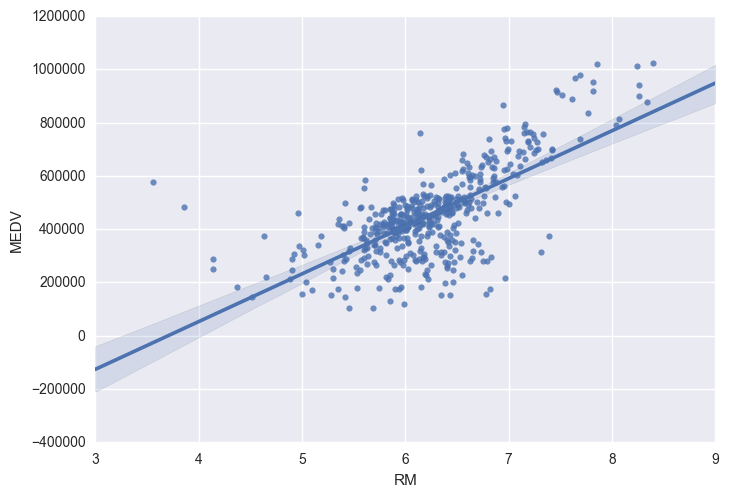

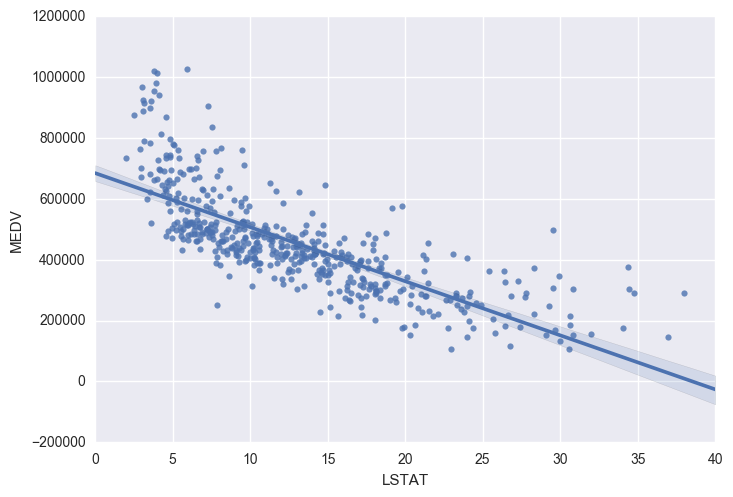

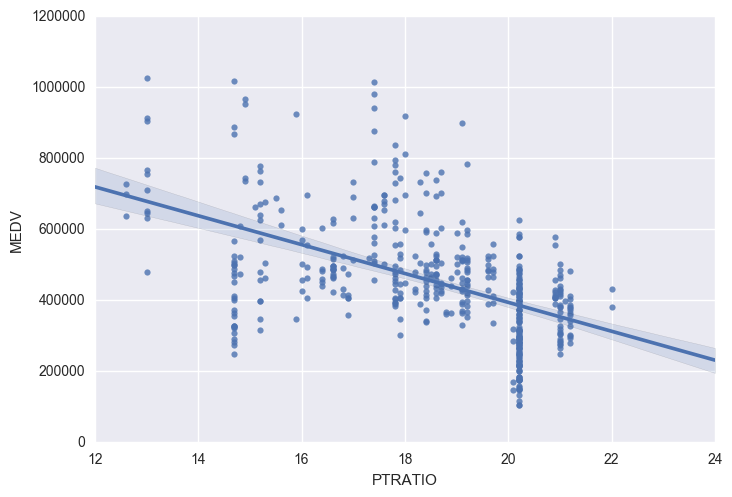

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

for var in ['RM', 'LSTAT', 'PTRATIO']:
    sns.regplot(data[var], prices)
    plt.show()

The 3 graphs above show that the data does support our initial 3 hypotheses.

1.) As the number of rooms increase, so does the price of the home.

2.) As the percentage of homeowners labeled as "lower class" in the neighborhood increases, the price of a house tends to decrease.

3.) As the ratio of students to teachers increases, the price of a house tends to decrease.

----

## Modeling
Now that we have a better understanding of the data we can develop a model that will help us predict the price of a home given it's features.

### Defining a Performance Metric
To measure the quality of our model, we'll need some type of performance metric.

For this project, we'll utilize the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify our model's performance which describes how "good" our model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1 and can be interpreted as the proportion of variance our model explains. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. A negative R<sup>2</sup> is also possible which indicates the model is worse than one that always predicts the mean of the target variable.


In [4]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    score = r2_score(y_true,y_predict)
    return score

### Train/Test Split
We'll need to split our data into training and tests so that we have a way to evaluate how our model performs to unseen data. The data is also usually shuffled in a random order to remove any bias in the ordering of the dataset.

In [5]:
from sklearn.cross_validation import train_test_split

# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features,prices, test_size=.20, random_state=5)

print "Training and testing split was successful."

Training and testing split was successful.


----

## Analyzing Model Performance
Next we'll evaluate several learning and testing performances on various subsets of training data. We'll specifically examine the `'max_depth'` parameter on the training set to observe how model complexity affects performance.

### Learning Curves
Below are four graphs for a decision tree model with different maximum depths. Each graph shows the learning curves of the model for both training and testing as the size of the training set is increased. The shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination. 

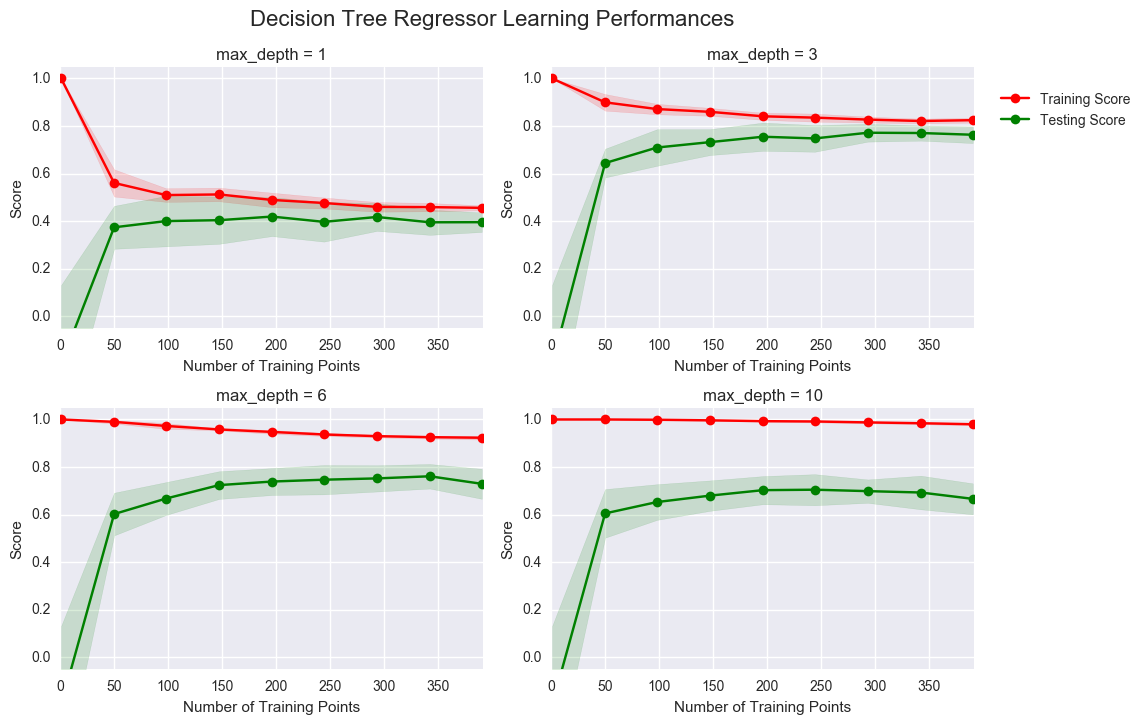

In [6]:
# Produce learning curves for different training set sizes and maximum depths
vs.ModelLearning(features, prices)

Looking at the graphs above, as the number of training points increase, the training curves tend to decrease while the testing curve increases. This makes sense because when have a small amount of data, our model can simply memorize the training data but it does not generalize well to new examples. As we get more data, it becomes more difficult to memorize data but our model can generalize better. After a certain number of training points are reached, we can see both training and testing curves begin to plateau which means adding more data won't provide much of a performance increase which is important to know since getting more data is often time consuming and expensive.

The graph with max_depth = 3 seems to be performing the best as boths curves are converging to the r^2 score of 0.8 which is the highest out of the four graphs. Also between 250-300 training points is when curves begin to converge so adding more data won't be so beneficial.

### Complexity Curves
The graph below produces two complexity curves for a decision tree model that has been trained and validated using different maximum depths.

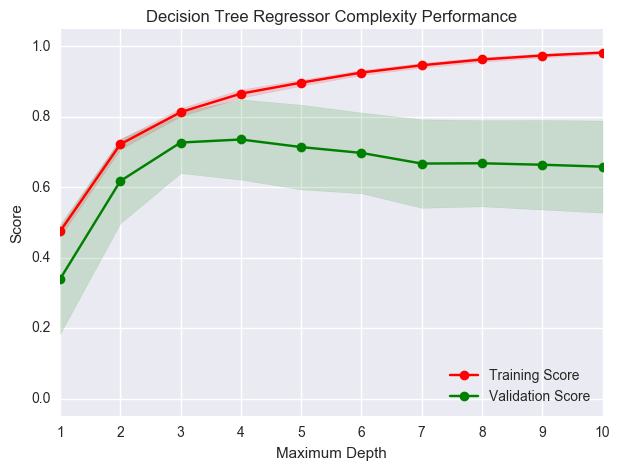

In [7]:
vs.ModelComplexity(X_train, y_train)

### Bias-Variance Tradeoff
Our model above at max depth = 1 suffers from high bias due to its low training and validation scores as well as low variance shown by the small gap between the two curves.

At max depth = 10 our model suffers from low bias, high variance due to the large gap between curves. The model here is too complex as its just memorizing the training data and isn't generalizing well. Futhermore, the curves at this point are diverging which means our model performance just gets worse as we increase complexity so it better to set a lower max depth in this case.

A max depth = 3 seems to be optimal for our model since this is the point were both curves are converging to a point with a high R^2 value.



-----

## Evaluating Model Performance
Next we'll develop a model and evaluate it's performance using techniques such Grid Serach to find optimal parameters for our model and Cross-Validation to assess how well our model generalizes to new data. 

### Grid Search

Grid serach is a technique used to test mutiple combinations of parameters of our model. For each combination of parameters, the model is trained and tested against a validation set to determine which parameters provide an optimal result.

Grid search can be very computationally expensive because if we have 4 parameters to tune with 10 values each then we have 10x10x10x10 = 10,000 trials. If we are doing 10-fold cross-validation then this equates to 100,000 model fits and predicts. 

As a solution, Randomized Search can be used instead which only uses a random subset of the parameter values. It allows us to choose how many combinations are used to save computation time. Although it's possible that grid search can find a better result, randomized search will often times find the best result with the execution time cut down significantly.

### Cross-Validation

K-fold cross-validation runs k experiments in which the data is split into k folds and the model is trained on k-1 folds and is tested on the kth fold. The average of scores received from each experiment becomes the final result. This is nice because we can use all your data for training and testing and since we are evaluating our model multiple times with different data, we receive a more reliable estimate of our model's performance on new data.

If we use grid search without a cross-validated set then we risk overfitting.

### Model Fitting
Now we'll bring everything we learned above together to train a model using the **decision tree algorithm**. We'll ensure our model is optimized by using grid search to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction.

The validation technique we'll use is `ShuffleSplit()`, an alternative form of cross-validation. Similar to K-Fold cross-validation, `ShuffleSplit()` creates (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*.

In [8]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """

    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)
    
    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':range(1,11)}

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # Create the grid search object
    grid = GridSearchCV(regressor,params,cv=cv_sets,scoring=scoring_fnc)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Now that our model has been trained we can now make predictions on new sets of data. Our trained *decision tree regressor* model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable** which is the price of a home is our case. 

In [9]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Print Model Score
print "Model R^2 Score: ",reg.score(X_test, y_test)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Model R^2 Score:  0.854643747656
Parameter 'max_depth' is 4 for the optimal model.


### Model Interpretation

A major advantage of using decision trees is the interpretability of the model. We can visualize our model and see exactly the questions our decision tree is asking and how it comes up with a prediction.

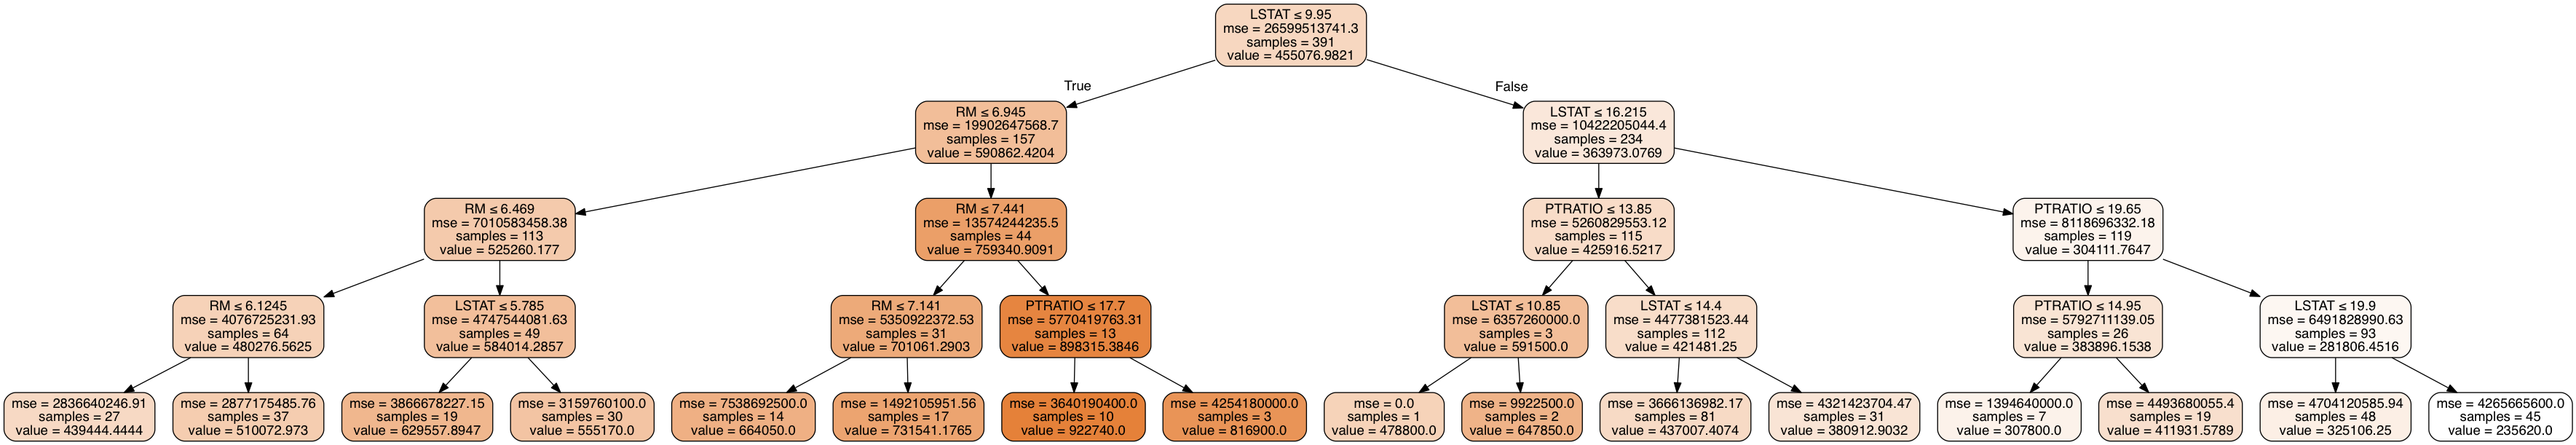

In [27]:
from IPython.display import Image
from sklearn.externals.six import StringIO
import pydotplus
from sklearn import tree

dot_data = StringIO()
tree.export_graphviz(reg, out_file=dot_data,
    feature_names=X_train.columns,
    class_names="PRICES",
    filled=True, rounded=True,
    special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png(),width=1000, height=1000)

### Predicting Selling Prices
We can also enter our own data into our model. Imagine we're a real estate agent and we've gathered data from three clients and would like to provide valuation estimates for their home.

| Feature | Client 1 | Client 2 | Client 3 | Boston's Average |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms | 6 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% | 13% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 | 19-to-1 |

In [11]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $411,931.58
Predicted selling price for Client 2's home: $235,620.00
Predicted selling price for Client 3's home: $922,740.00


### Does our model produce reasonable results?

In [12]:
# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


Client 1's home has 5 rooms which is slightly below the Boston average (6), neighborhood poverty level at 17% which is worse than average (13%) and a student to teacher ratio of 15:1 which is better than the average (19:1). Since features of this home lie close to the average, I would expect the price of their home to fall within the average price of houses in Boston which is what our model predicted ($411,931.58).

Client 2's home has 4 rooms which is below the average, a very high poverty level at 32% and a very high student to teacher ratio at 22:1. I expect this home to be priced below average which is consistent with our model's predicted selling price of $235,620.00.

Client 3's home has 8 rooms which is above average and also has a very low poverty level at 3%. The student to teacher ratio is also relatively low at 12:1 which may be very attactive for home buyers looking to start or raise a family in the neighborhood so I would expect this house to be priced above average which is consistent with the predicted selling price from our model at $922,740.00.



### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. We can test how reliable our model is by training our model ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

In [13]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61


Although our model provides high accuracy on the given data, it's not suggested that this model be used in a real-world setting as housing data collected from 1978 varies drastically from today. Furthermore, the model does not provide consistent enough predictions as the range in price predictions after ten trials has a range of $69,000. Furthermore, data collected in an urban city like Boston wouldn't be applicable to a rural city since settings are entirely different. To develop a model more applicable to the real world, we need more up to date data that resembles current market trends. We'll also need to collect data from homes with a wide variety of features such as the number of bathrooms, condition of the house, distance to schools and shopping, etc. 